In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# EDA

df=pd.read_csv('./diabetes.csv')
data=df.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64

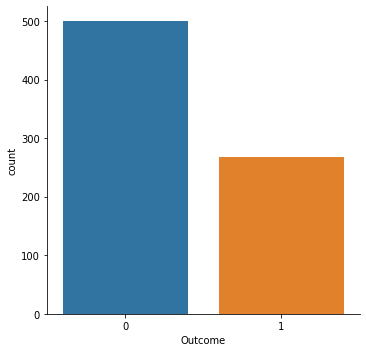

In [4]:
y=data.Outcome
x=data.drop(['Outcome'], axis=1)

_=sns.catplot(x='Outcome', kind='count', data=data)
(data.Outcome).value_counts()

In [5]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


Text(0.5, 1.0, 'Violin Plot')

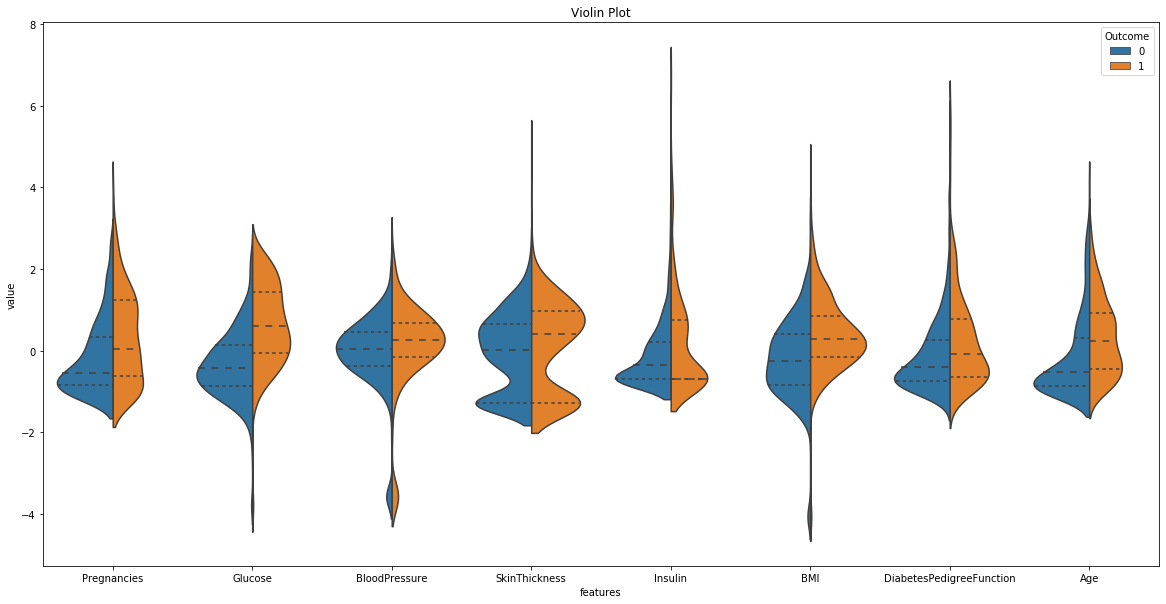

In [6]:
## Standarization
data_diag=y
data=x

data_s=(data-data.mean())/(data.std())
data=pd.concat([y,data_s],axis=1)
data=pd.melt(data, id_vars='Outcome',var_name='features', value_name='value')

## violineplot
plt.figure(figsize=(20,10))
_=sns.violinplot(x='features',y='value', hue='Outcome', split=True,inner='quart',data=data)
plt.title('Violin Plot')

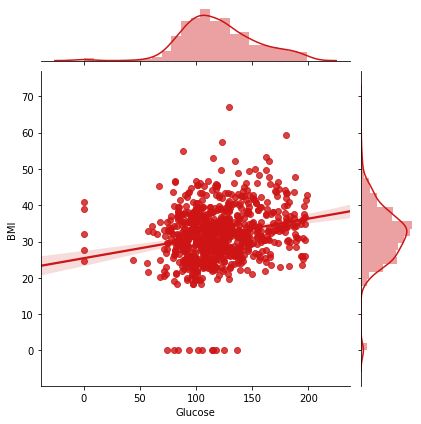

In [7]:
## Does Glucose and Insulin Correlated?
## scatter plot with histogram and line
sns.jointplot(x.loc[:,'Glucose'], x.loc[:,'BMI'],kind='regg',color="#ce1414")

In [8]:
# Gaussian Naive Bayes Classification
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

%matplotlib inline
data = pd.read_csv('./diabetes.csv')

X = data.drop(columns=['Outcome'],axis=1)
Y = data['Outcome']

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
model = GaussianNB()
cv_scores = cross_val_score(model, X, Y, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

GaussianNB(priors=None, var_smoothing=1e-09)  mean accuracy:  75.134 % std:  0.035 %


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [12]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols = X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4.539474,151.0,90.0,46.000000,159.97193,42.1,0.371,21.0
1,1.000000,83.0,68.0,29.411458,159.97193,18.2,0.624,27.0
2,2.000000,122.0,70.0,27.000000,159.97193,36.8,0.340,27.0
3,4.000000,146.0,78.0,29.411458,159.97193,38.5,0.520,67.0
4,4.539474,123.0,72.0,29.411458,159.97193,36.3,0.258,52.0


In [13]:
predict_train = model.fit(X_train, y_train).predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train, predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.7597765363128491
accuracy_score on test dataset :  0.7575757575757576


In [14]:
result = X_test.copy()
result['real'] = y_test.values.tolist()
result['pred'] = predict_test

In [15]:
result.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,real,pred
0,1.000000,199.0,76.0,43.000000,143.981651,42.9,1.394,22.0,1,1
1,2.000000,107.0,74.0,30.000000,100.000000,33.6,0.404,23.0,0,0
2,4.000000,76.0,62.0,28.522293,143.981651,34.0,0.391,25.0,0,0
3,5.000000,166.0,72.0,19.000000,175.000000,25.8,0.587,51.0,1,1
4,4.393035,111.0,65.0,28.522293,143.981651,24.6,0.660,31.0,0,0


In [16]:
result.to_csv('./diabetes.result.csv', index=False)  